In [3]:
import sqlite3

import pandas as pd

import matplotlib.pyplot as plt

ValueError: Key backend: 'module://matplotlib_inline.backend_inline' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [137]:
conn =sqlite3.connect("./database.sqlite")

cursor = conn.cursor()

In [138]:
table_match = pd.read_sql('select * from Match',conn)
table_player = pd.read_sql('select * from Player',conn)
table_player_attribute = pd.read_sql('select * from Player_Attributes',conn)
table_league = pd.read_sql('select * from League',conn)
table_country = pd.read_sql('select * from Country',conn)
table_team = pd.read_sql('select * from Team',conn)
table_team_attribute = pd.read_sql('select * from Team_Attributes',conn)

In [139]:
first_fifty_players = pd.read_sql("""select Player.height as height,
                                          Player.weight as weight,
                                          Player_Attributes.overall_rating as rating,
                                          Player_Attributes.potential as potential,
                                          Player_Attributes.preferred_foot,
                                          Player.player_name as name,
                                          Player.birthday as birthday,
                                          Player.player_api_id
                                    FROM Player
                                    LEFT JOIN Player_Attributes ON Player.player_api_id = Player_Attributes.player_api_id
                                    WHERE Player_Attributes.potential IS NOT NULL 
                                      AND Player_Attributes.date BETWEEN '2015-01-01' AND '2016-12-31'
                                    GROUP BY Player_Attributes.player_api_id
                                    ORDER BY Player_Attributes.overall_rating DESC 
                                    LIMIT 100
                                    ;""", conn)
first_fifty_players

,height,weight,rating,potential,preferred_foot,name,birthday,player_api_id
0,170.18,159,94,94,left,Lionel Messi,1987-06-24 00:00:00,30981
1,185.42,176,93,93,right,Cristiano Ronaldo,1985-02-05 00:00:00,30893
2,182.88,187,90,90,right,Luis Suarez,1987-01-24 00:00:00,40636
3,193.04,203,90,90,right,Manuel Neuer,1986-03-27 00:00:00,27299
4,175.26,150,90,94,right,Neymar,1992-02-05 00:00:00,19533
...,...,...,...,...,...,...,...,...
95,187.96,168,83,85,left,Daniel Sturridge,1989-09-01 00:00:00,51553
96,185.42,187,83,83,right,Jackson Martinez,1986-10-03 00:00:00,51360
97,195.58,209,83,84,right,Ralf Faehrmann,1988-09-27 00:00:00,49586
98,190.50,203,83,83,right,Mehdi Benatia,1987-04-17 00:00:00,46875


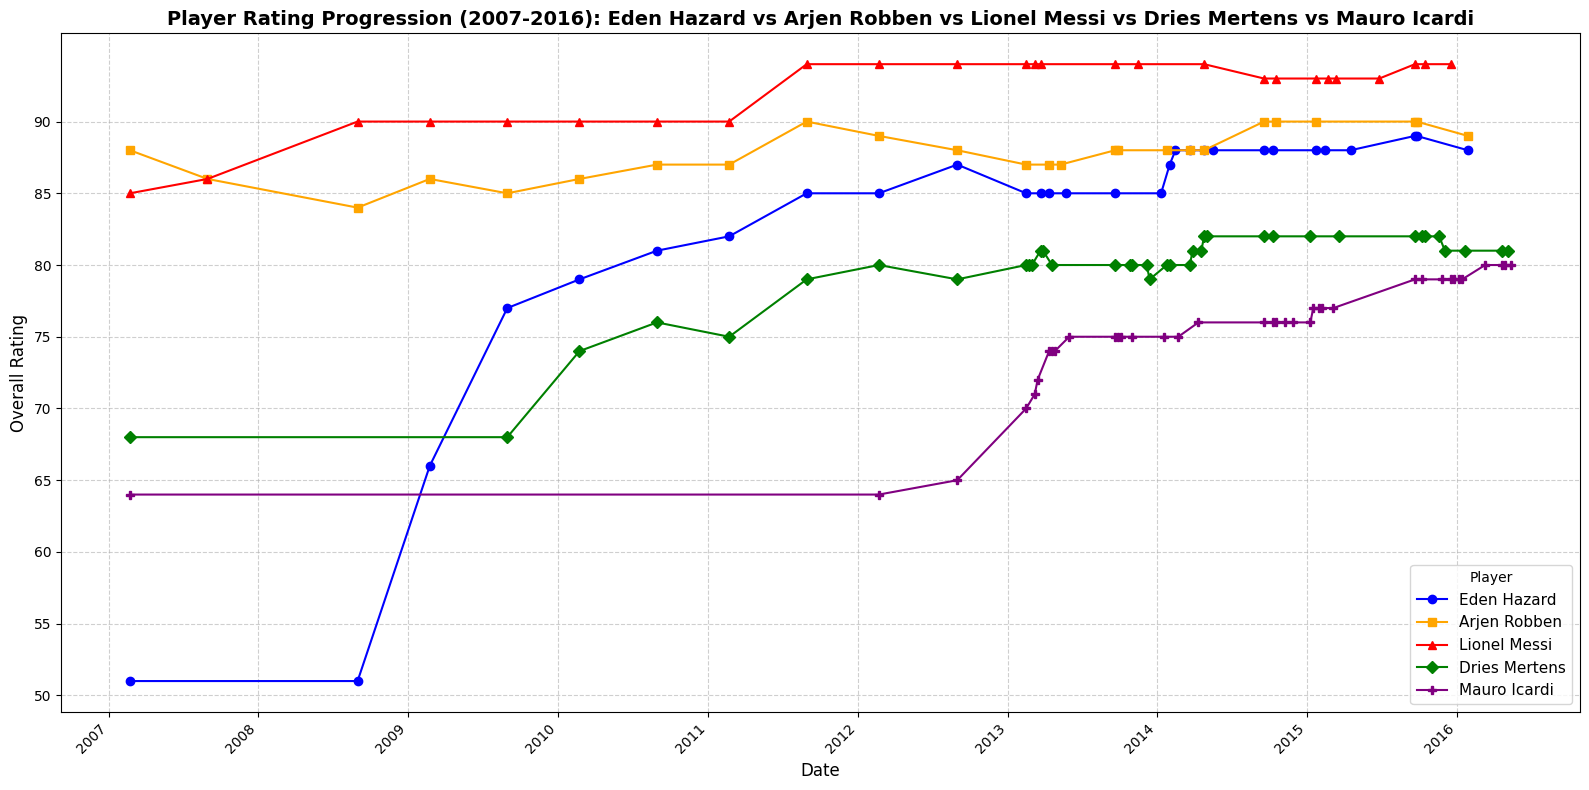

In [140]:
def plot_player_progression(player_names, conn, start_date='2007-01-01', end_date='2016-12-31'):
    # SQL query to get data for the specified players
    query = f"""
        SELECT Player.player_name, Player_Attributes.date, Player_Attributes.overall_rating
        FROM Player
        LEFT JOIN Player_Attributes ON Player.player_api_id = Player_Attributes.player_api_id
        WHERE Player.player_name IN ({', '.join([f"'{name}'" for name in player_names])})
          AND Player_Attributes.date BETWEEN '{start_date}' AND '{end_date}'
        ORDER BY Player_Attributes.date;
    """

    # Fetch data
    player_progression = pd.read_sql(query, conn)
    
    # Convert date to datetime format
    player_progression['date'] = pd.to_datetime(player_progression['date'])

    # Define color and style combinations
    colors = ['blue', 'orange', 'red', 'green', 'purple', 'black']
    markers = ['o', 's', '^', 'D', 'P', '*']

    # Plotting the data with enhancements
    plt.figure(figsize=(16, 8))

    for i, player in enumerate(player_names):
        player_data = player_progression[player_progression['player_name'] == player]
        plt.plot(player_data['date'], player_data['overall_rating'], 
                 marker=markers[i % len(markers)], 
                 color=colors[i % len(colors)], 
                 linestyle='-', 
                 label=player)

    # Adding chart details
    plt.title(f"Player Rating Progression ({start_date[:4]}-{end_date[:4]}): {' vs '.join(player_names)}", fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Overall Rating', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(range(50, 95, 5))  # Adjust y-axis ticks for better readability
    plt.legend(title='Player', fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
    
plot_player_progression(['Eden Hazard', 'Arjen Robben', 'Lionel Messi', 'Dries Mertens', 'Mauro Icardi'], conn)


C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\2154782262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='preferred_foot', y='rating', data=df, palette='Set2')


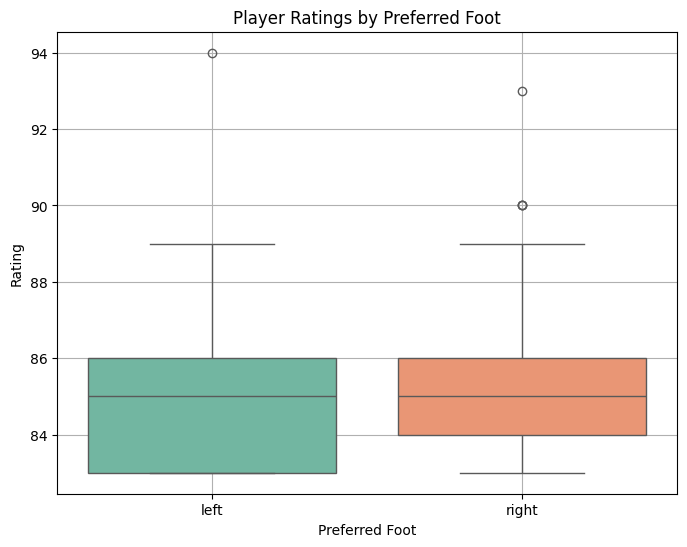

In [141]:
def plot_rating_by_foot(df):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='preferred_foot', y='rating', data=df, palette='Set2')
    plt.title('Player Ratings by Preferred Foot')
    plt.xlabel('Preferred Foot')
    plt.ylabel('Rating')
    plt.grid(True)
    plt.show()

plot_rating_by_foot(first_fifty_players)


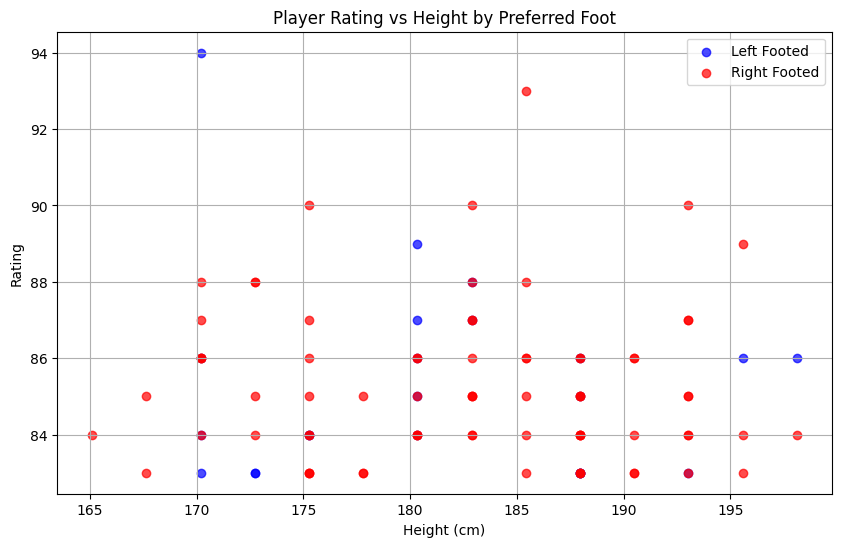

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot player comparison by preferred foot
def plot_players_by_foot(df):
    # Grouping data by preferred foot
    left_footed = df[df['preferred_foot'] == 'left']
    right_footed = df[df['preferred_foot'] == 'right']
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for left-footed players
    plt.scatter(left_footed['height'], left_footed['rating'], color='blue', label='Left Footed', alpha=0.7)
    
    # Scatter plot for right-footed players
    plt.scatter(right_footed['height'], right_footed['rating'], color='red', label='Right Footed', alpha=0.7)
    
    # Adding labels and title
    plt.title('Player Rating vs Height by Preferred Foot')
    plt.xlabel('Height (cm)')
    plt.ylabel('Rating')
    
    # Add legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_players_by_foot(first_fifty_players)


In [143]:
players_from_csv = pd.read_csv('./ML/player.csv')

C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\985791319.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_metric1[metric1], y=top_metric1.index, palette="viridis", ax=axes[0])
C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\985791319.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_metric2[metric2], y=top_metric2.index, palette="coolwarm", ax=axes[1])


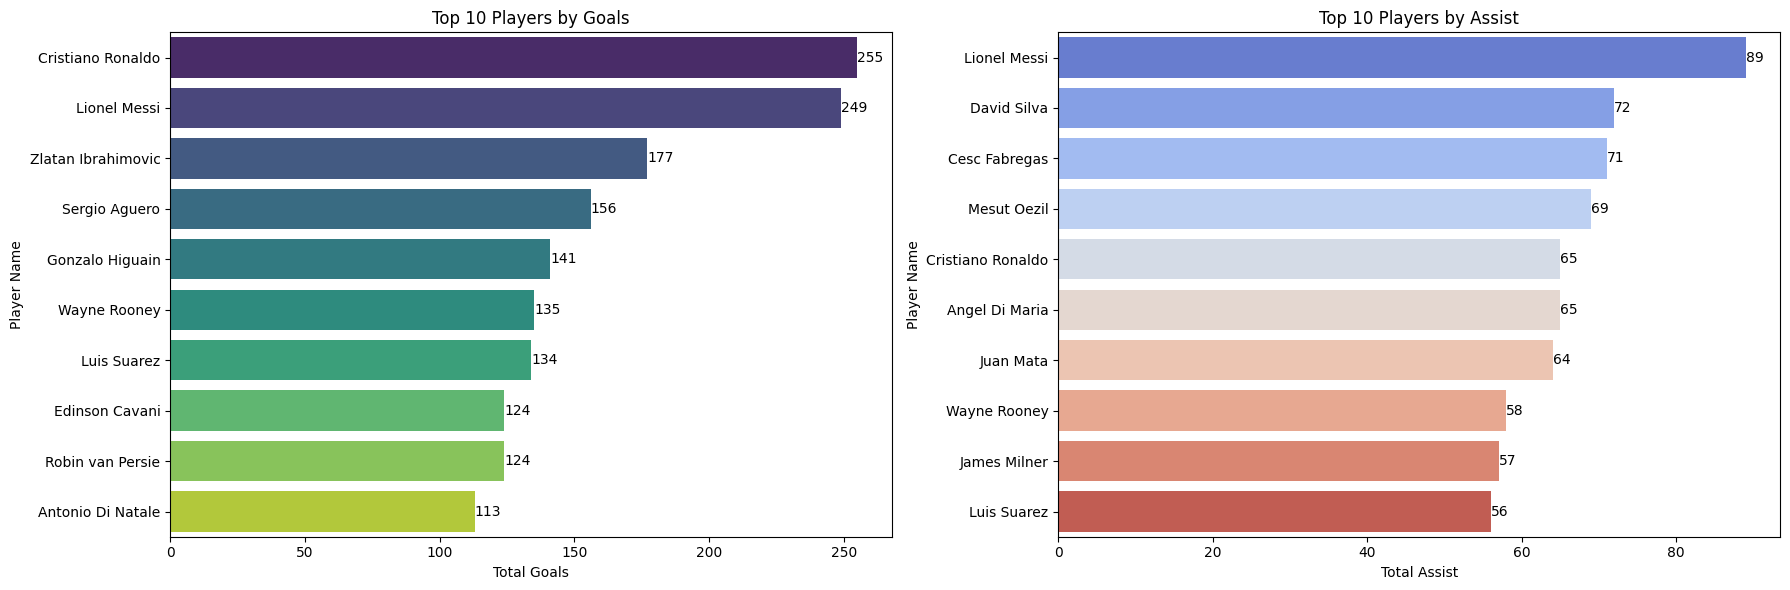

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_players_with_names(file_path, metric1, metric2, top_n=10):
    """
    Creates a side-by-side bar chart of the top players based on two metrics, with player names annotated.

    Parameters:
    - file_path (str): Path to the CSV file.
    - metric1 (str): First metric to rank players by (e.g., 'goals').
    - metric2 (str): Second metric to rank players by (e.g., 'assist').
    - top_n (int): Number of top players to include in each chart.

    Returns:
    - None (displays the plots).
    """
    # Load the dataset
    data = pd.read_csv(file_path)

    # Group by player_name and sum the metrics
    player_stats = data.groupby('player_name')[[metric1, metric2]].sum()

    # Get the top players for each metric
    top_metric1 = player_stats.sort_values(metric1, ascending=False).head(top_n)
    top_metric2 = player_stats.sort_values(metric2, ascending=False).head(top_n)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

    # Plot Top Players by Metric 1
    sns.barplot(x=top_metric1[metric1], y=top_metric1.index, palette="viridis", ax=axes[0])
    axes[0].set_title(f'Top {top_n} Players by {metric1.capitalize()}')
    axes[0].set_xlabel(f'Total {metric1.capitalize()}')
    axes[0].set_ylabel('Player Name')

    # Annotate player names on bars for Metric 1
    for i, value in enumerate(top_metric1[metric1]):
        axes[0].text(value, i, f'{value}', va='center', ha='left', fontsize=10)

    # Plot Top Players by Metric 2
    sns.barplot(x=top_metric2[metric2], y=top_metric2.index, palette="coolwarm", ax=axes[1])
    axes[1].set_title(f'Top {top_n} Players by {metric2.capitalize()}')
    axes[1].set_xlabel(f'Total {metric2.capitalize()}')
    axes[1].set_ylabel('Player Name')

    # Annotate player names on bars for Metric 2
    for i, value in enumerate(top_metric2[metric2]):
        axes[1].text(value, i, f'{value}', va='center', ha='left', fontsize=10)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Example usage
file_path = './ML/player.csv'
plot_top_players_with_names(file_path, metric1='goals', metric2='assist', top_n=10)


In [145]:
def plot_top_10_by_season(data_frame, season):
    """
    Plot the top 10 players by goals and assists for a given season, ensuring each plot has unique player names.

    Parameters:
    - data_frame (pd.DataFrame): The DataFrame containing player data.
    - season (int): The season to analyze.

    Returns:
    None (displays a single figure with two plots side-by-side).
    """
    import matplotlib.pyplot as plt

    # Filter valid data for season, assists, and goals
    filtered_data = data_frame.dropna(subset=['season', 'assist', 'goals'])
    filtered_data['season'] = filtered_data['season'].astype(int)
    
    # Get top 10 players by goals and assists for the specified season
    season_data = filtered_data[filtered_data['season'] == season]
    top_10_goals = season_data.nlargest(10, 'goals')[['player_name', 'goals']]
    top_10_assists = season_data.nlargest(10, 'assist')[['player_name', 'assist']]
    
    # Create a single figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle(f"Top 10 Players by Goals and Assists - Season {season}", fontsize=16)

    # Goals plot
    axes[0].barh(top_10_goals['player_name'], top_10_goals['goals'], color='skyblue')
    axes[0].set_title('Top 10 by Goals')
    axes[0].set_xlabel('Goals')
    axes[0].set_ylabel('Player Name')
    axes[0].invert_yaxis()

    # Assists plot
    axes[1].barh(top_10_assists['player_name'], top_10_assists['assist'], color='lightgreen')
    axes[1].set_title('Top 10 by Assists')
    axes[1].set_xlabel('Assists')
    axes[1].set_ylabel('Player Name')
    axes[1].invert_yaxis()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()




C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\1633841857.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['season'] = filtered_data['season'].astype(int)


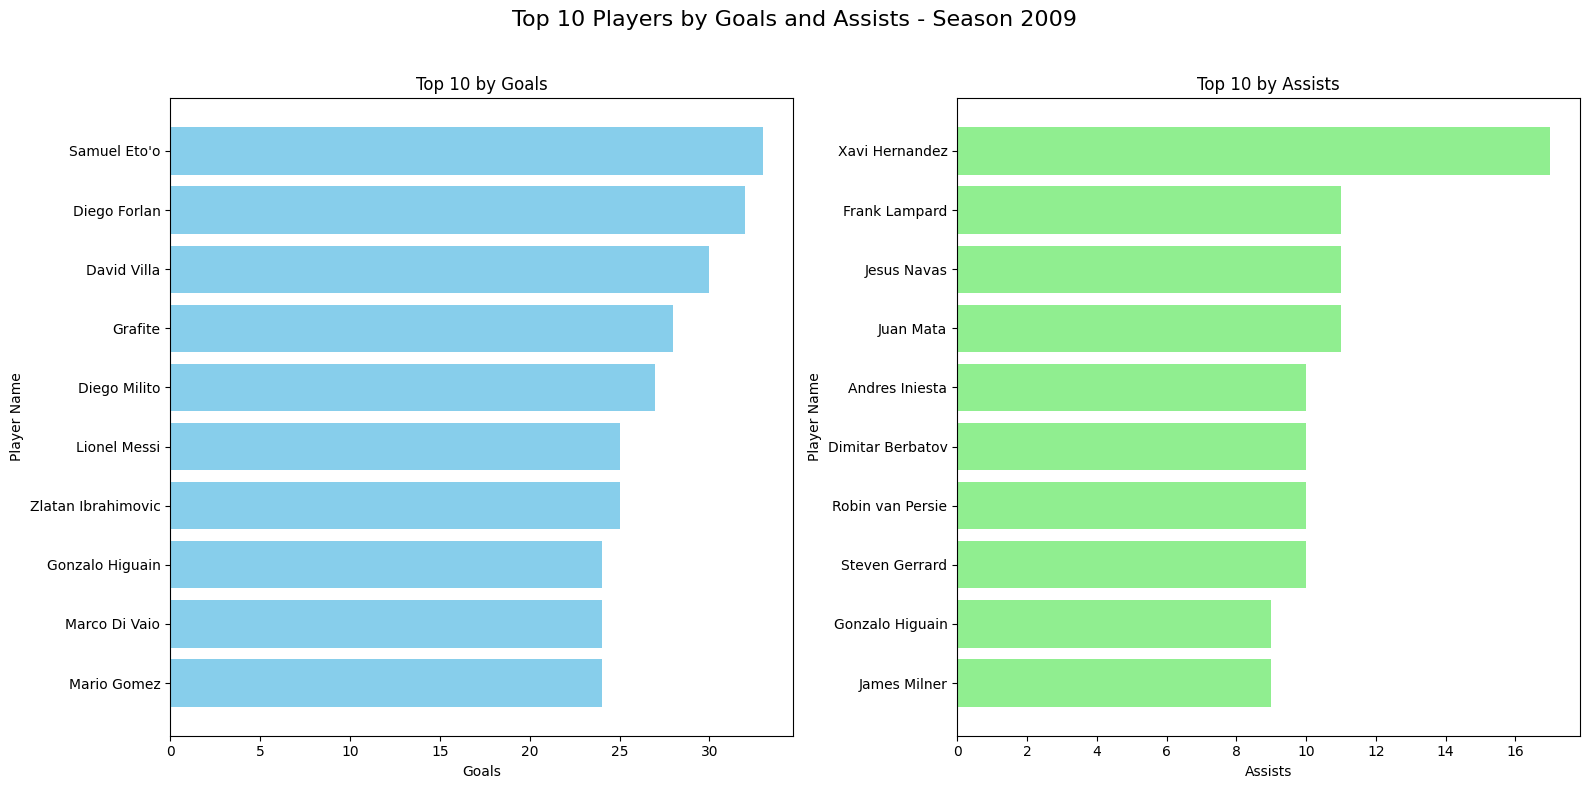

In [146]:

plot_top_10_by_season(players_from_csv, 2009)

C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\1633841857.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['season'] = filtered_data['season'].astype(int)


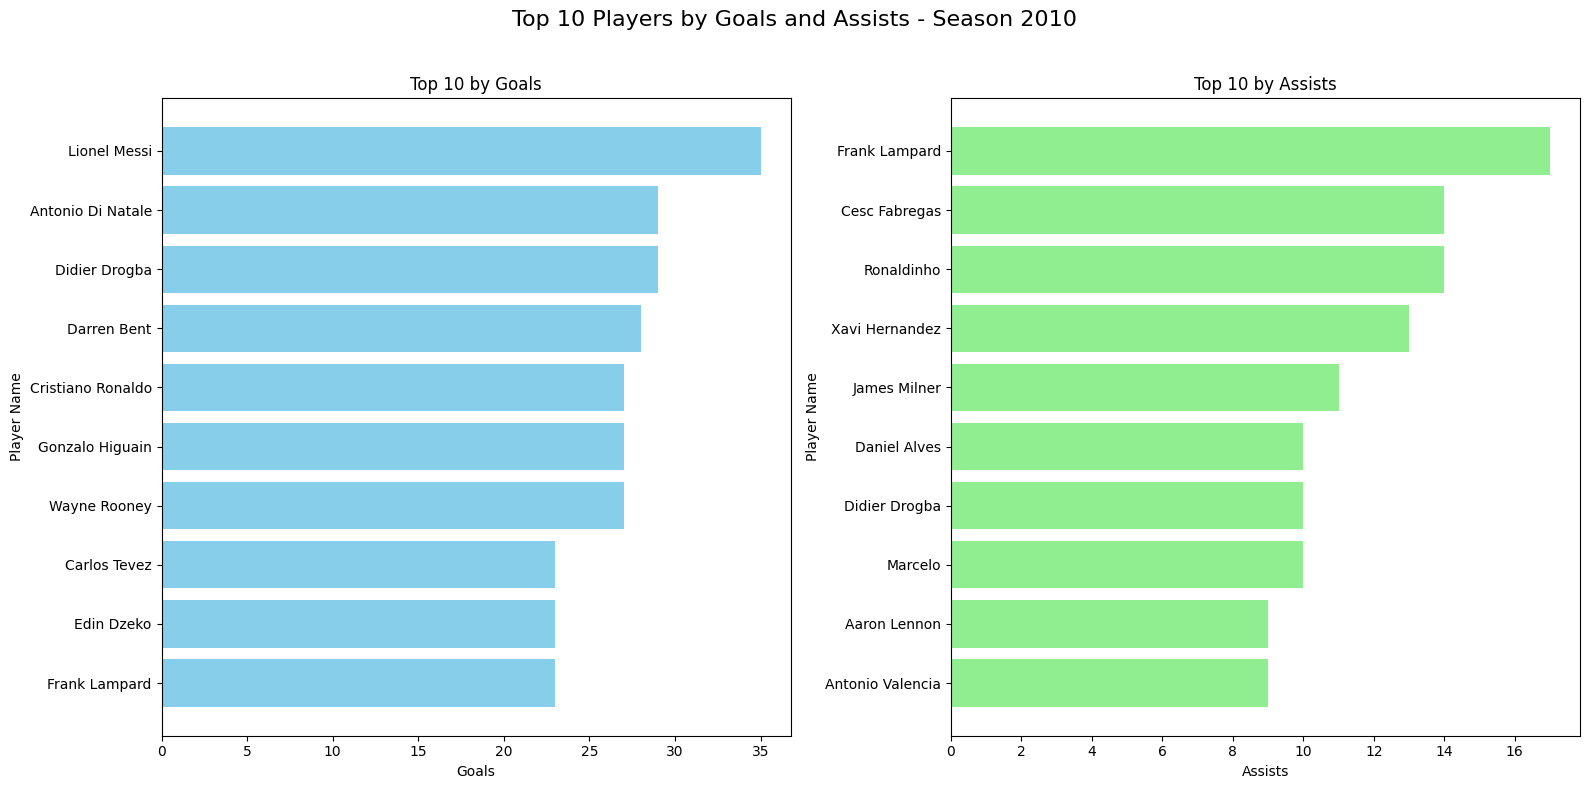

In [147]:
# Example usage
plot_top_10_by_season(players_from_csv, 2010)

C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\1633841857.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['season'] = filtered_data['season'].astype(int)


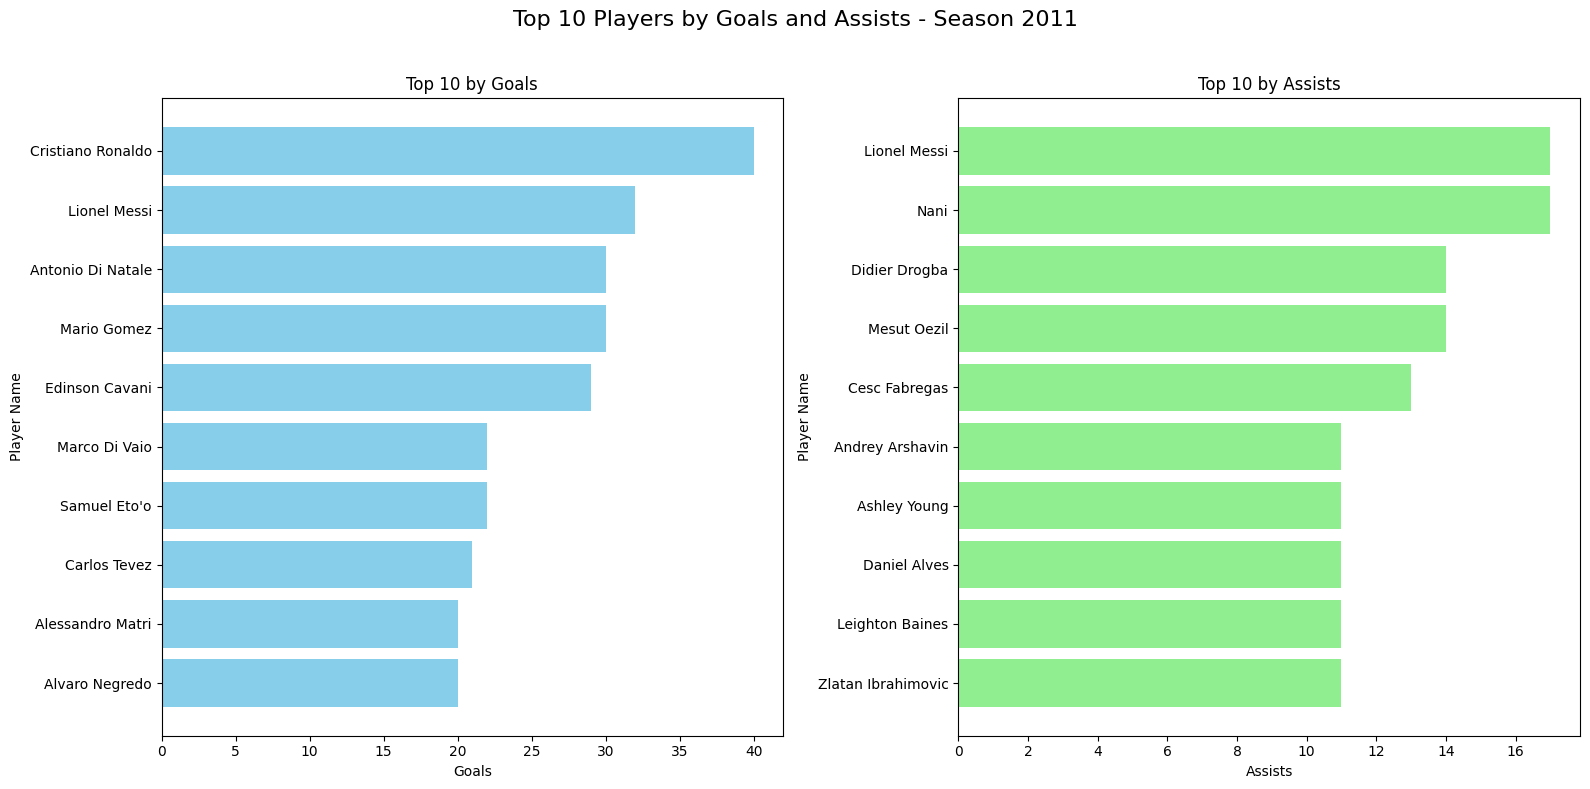

In [148]:
# Example usage
plot_top_10_by_season(players_from_csv, 2011)

C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\1633841857.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['season'] = filtered_data['season'].astype(int)


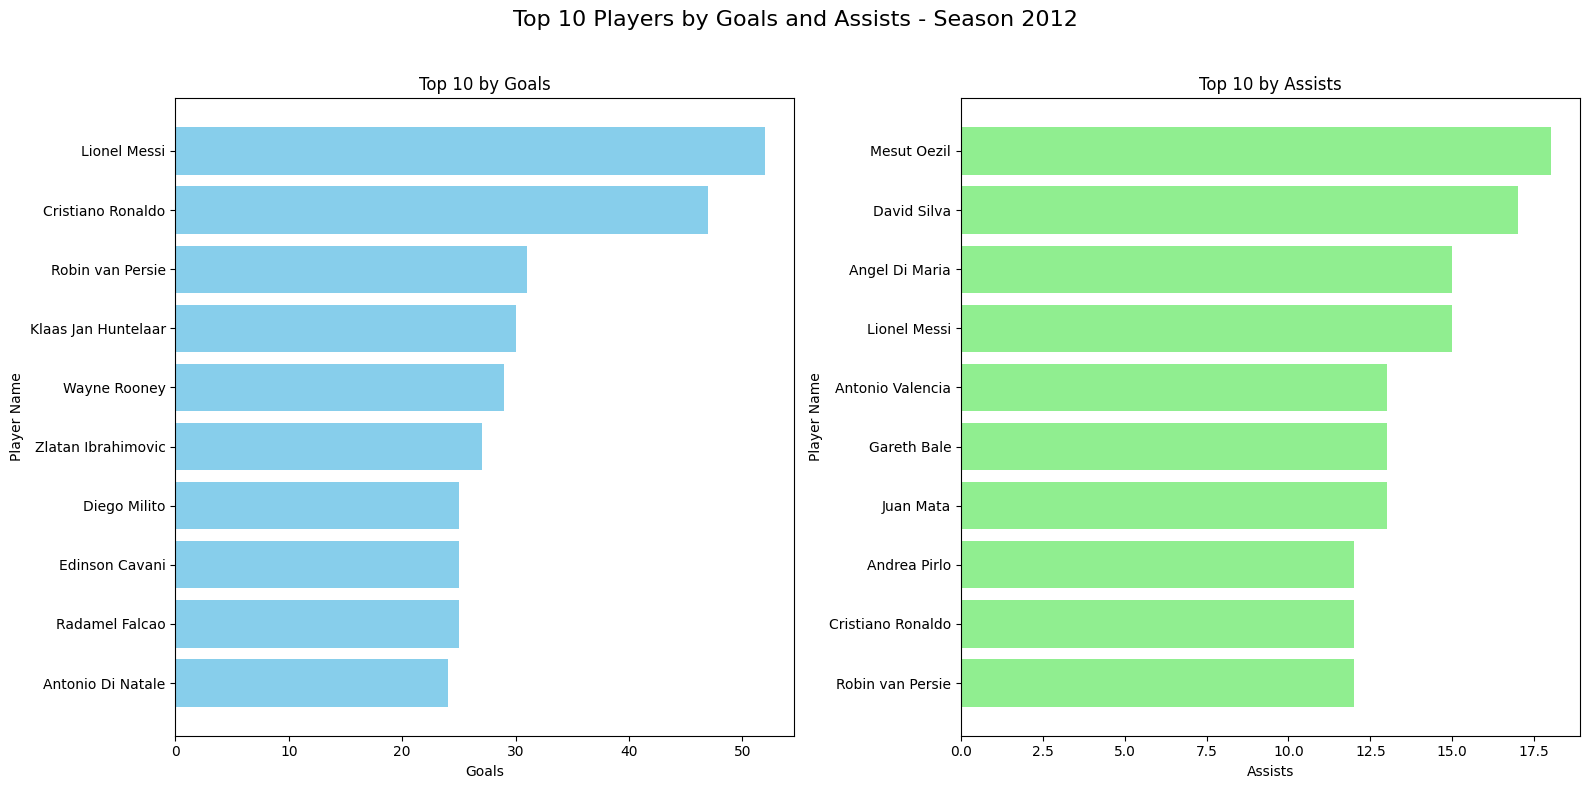

In [149]:
# Example usage
plot_top_10_by_season(players_from_csv, 2012)

C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\1633841857.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['season'] = filtered_data['season'].astype(int)


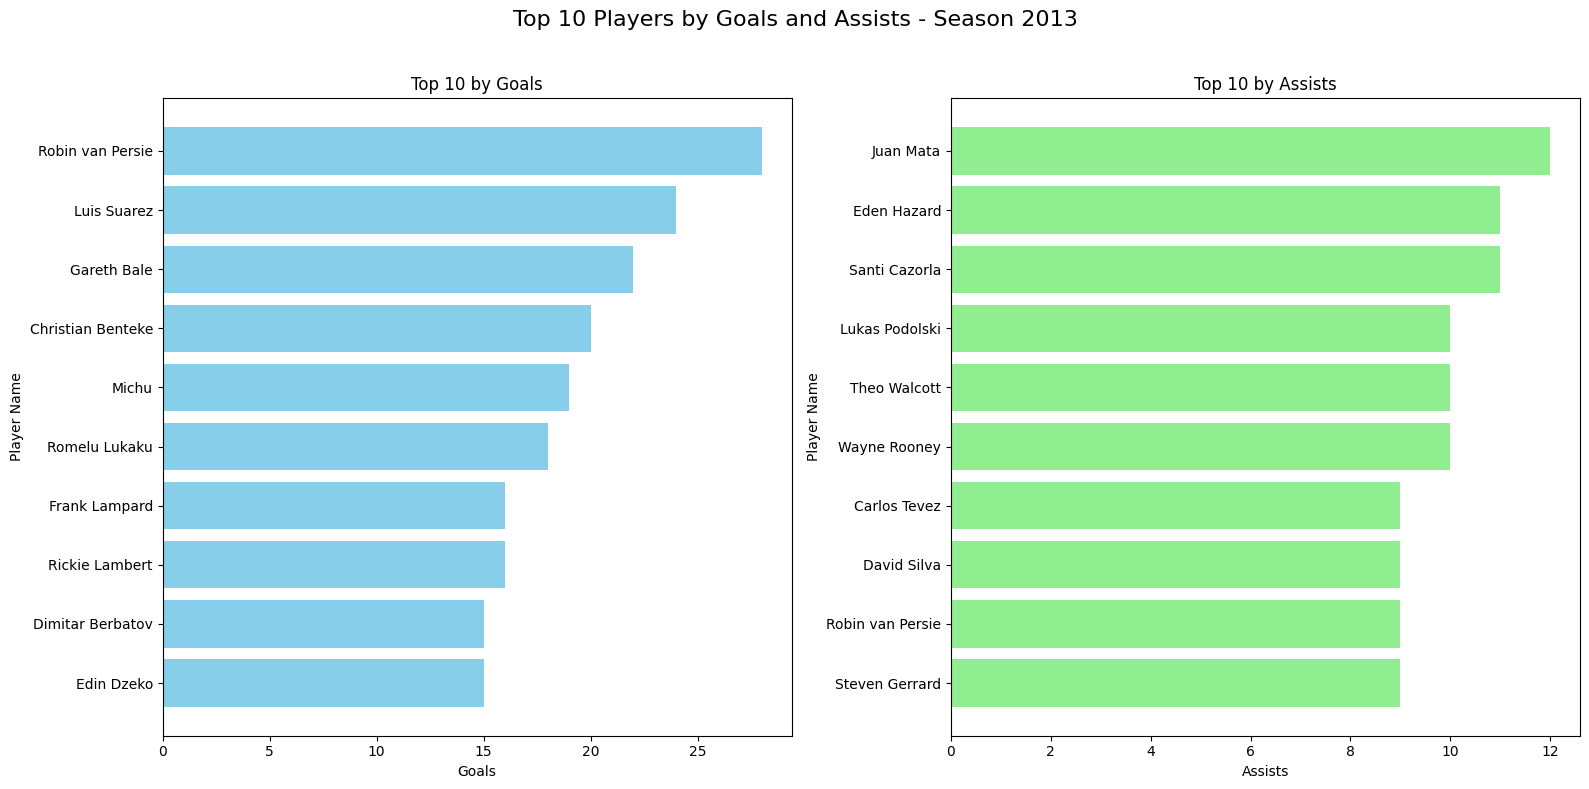

In [150]:
# Example usage
plot_top_10_by_season(players_from_csv, 2013)

C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\1633841857.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['season'] = filtered_data['season'].astype(int)


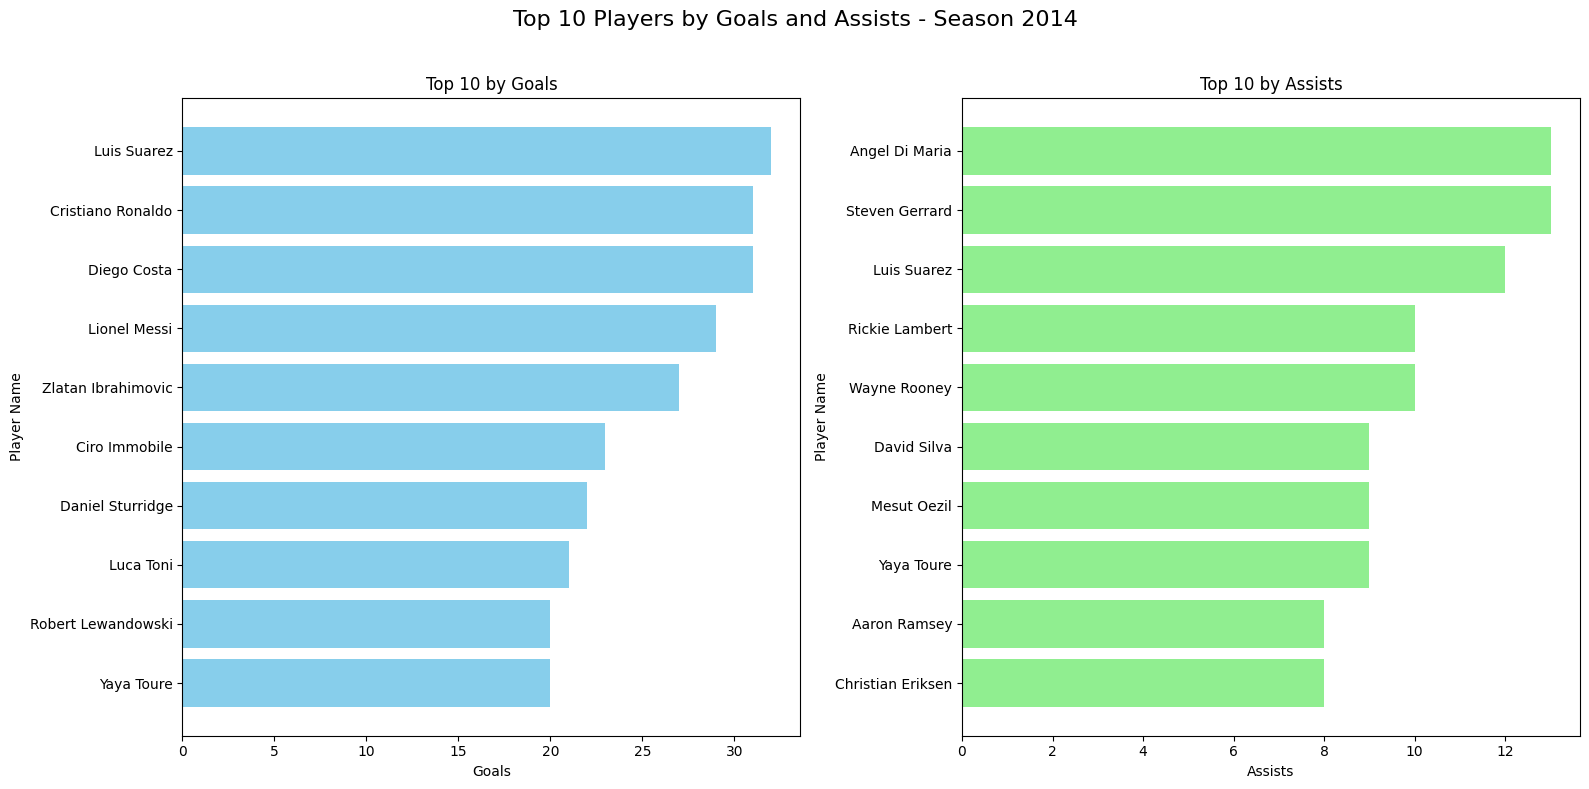

In [151]:
# Example usage
plot_top_10_by_season(players_from_csv, 2014)

C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\1633841857.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['season'] = filtered_data['season'].astype(int)


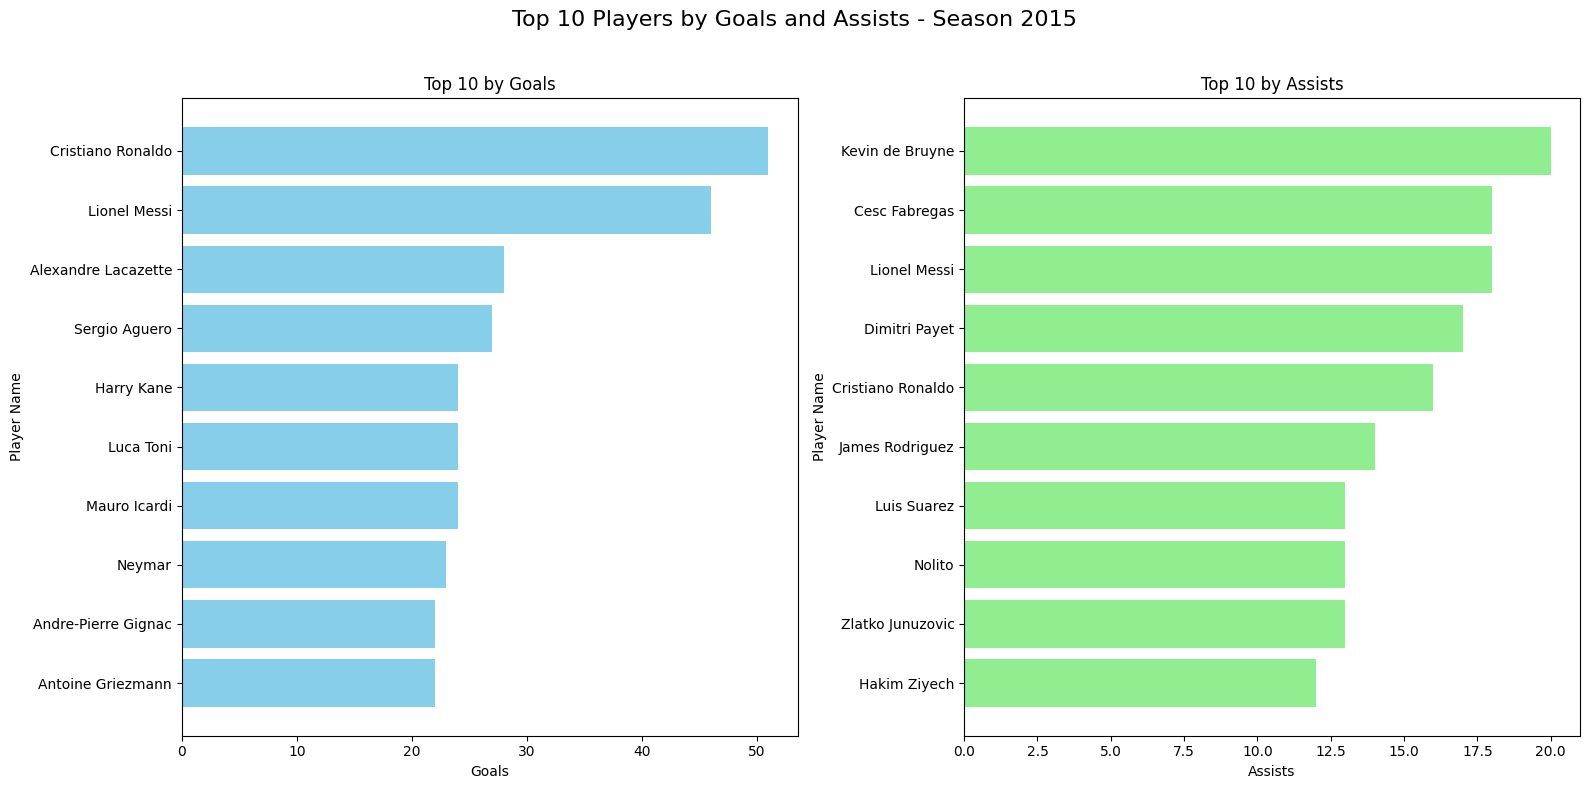

In [152]:
# Example usage
plot_top_10_by_season(players_from_csv, 2015)

C:\Users\Youcode\AppData\Local\Temp\ipykernel_18472\1633841857.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['season'] = filtered_data['season'].astype(int)


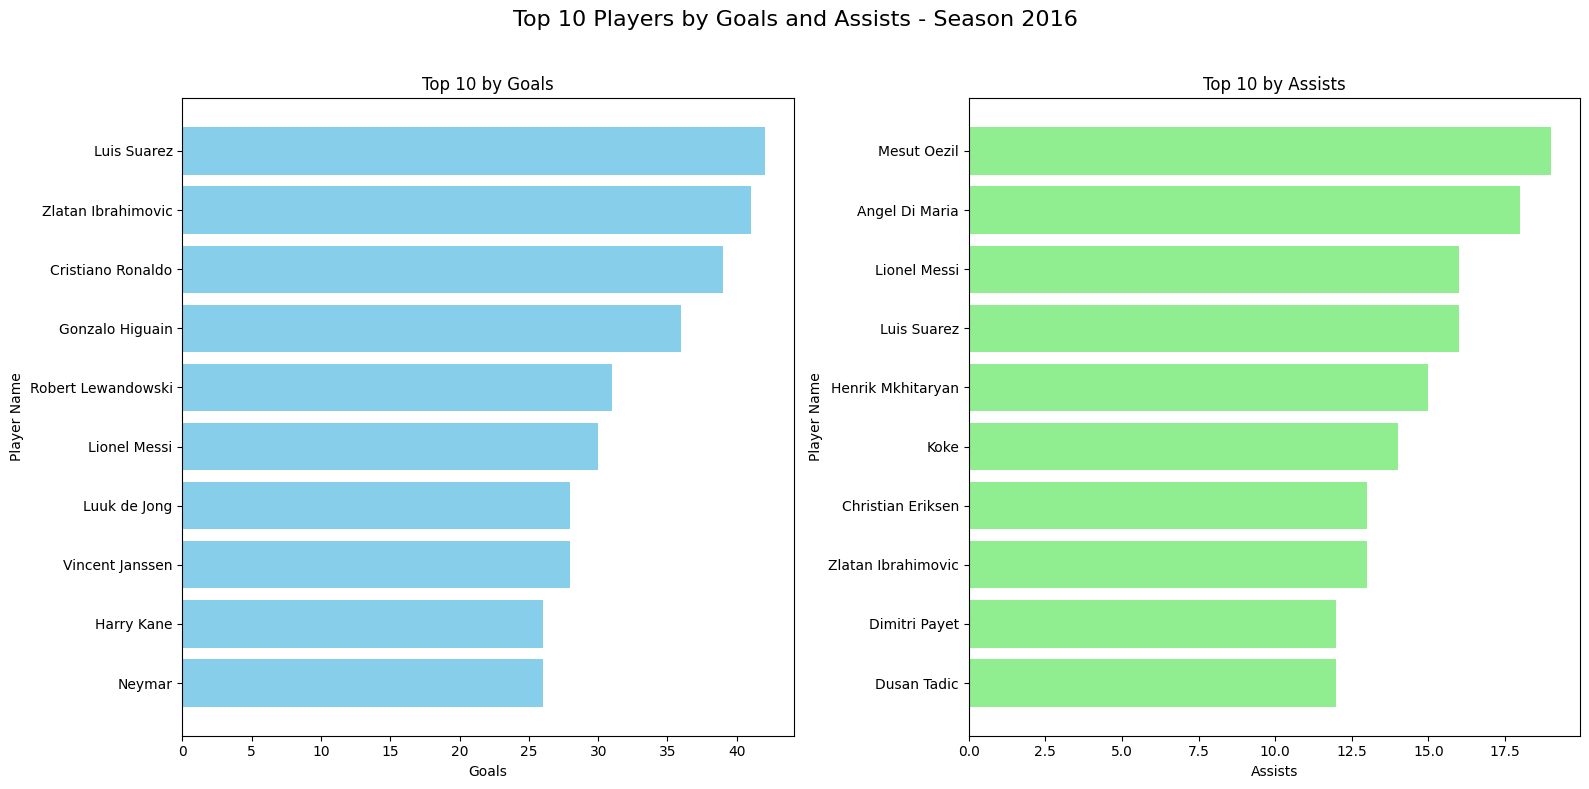

In [153]:
# Example usage
plot_top_10_by_season(players_from_csv, 2016)

# RELATION ENTRE L'AGE ET PERFORMANCE 

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_age_vs_performance(data, performance_column='goals'):
    """
    Plots player age against their performance (goals or assists).
    
    Parameters:
    - data (DataFrame): The player dataset containing 'birthday' and performance columns.
    - performance_column (str): Column name for the performance metric ('goals' or 'assist').
    
    Returns:
    - None: Displays the plot.
    """
    # Ensure the performance column exists
    if performance_column not in data.columns:
        raise ValueError(f"Column '{performance_column}' not found in the dataset.")
    
    # Calculate player age from their birthday
    data['age'] = data['birthday'].apply(lambda x: datetime.now().year - pd.to_datetime(x).year)
    
    # Remove rows with missing or invalid data
    valid_data = data.dropna(subset=['age', performance_column])
    
    # Scatter plot: Age vs. Performance
    plt.figure(figsize=(10, 6))
    plt.bar(valid_data['age'], valid_data[performance_column], color='blue')
    plt.title(f"Player Age vs {performance_column.capitalize()}", fontsize=16)
    plt.xlabel('Age (Years)', fontsize=14)
    plt.ylabel(performance_column.capitalize(), fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

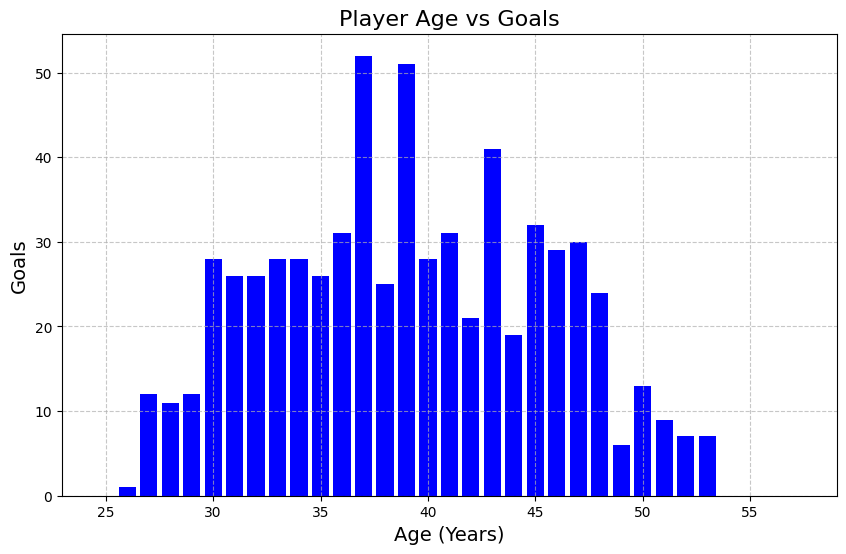

In [155]:
plot_age_vs_performance(players_from_csv, performance_column='goals')

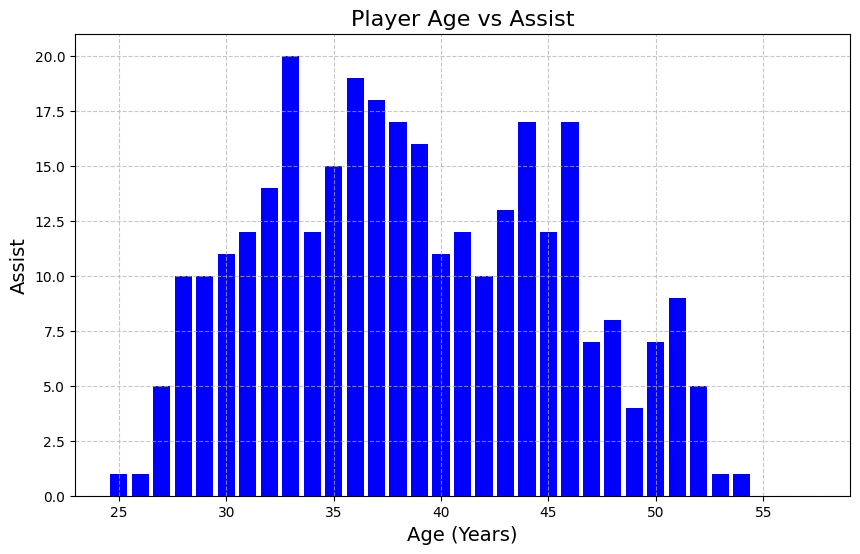

In [156]:
plot_age_vs_performance(players_from_csv, performance_column='assist')

In [157]:
import matplotlib.pyplot as plt

def plot_physical_vs_performance(data):
    """
    Creates a combined figure with subplots for:
    - Height vs Goals
    - Weight vs Goals
    - Height vs Assists
    - Weight vs Assists
    
    Parameters:
    - data (DataFrame): The dataset containing 'height', 'weight', 'goals', and 'assist' columns.
    
    Returns:
    - None: Displays the figure.
    """
    # Ensure required columns exist
    required_columns = ['height', 'weight', 'goals', 'assist']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' is missing from the dataset.")
    
    # Remove rows with missing values in the required columns
    valid_data = data.dropna(subset=required_columns)
    
    # Set up a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle("Physical Attributes vs Performance", fontsize=18, weight='bold')
    
    # bar Plot: Height vs Goals
    axes[0, 0].bar(valid_data['height'], valid_data['goals'], color='blue')
    axes[0, 0].set_title("Height vs Goals", fontsize=14)
    axes[0, 0].set_xlabel("Height (cm)", fontsize=12)
    axes[0, 0].set_ylabel("Goals", fontsize=12)
    axes[0, 0].grid(True, linestyle='--', alpha=0.7)
    
    # Scatter Plot: Weight vs Goals
    axes[0, 1].bar(valid_data['weight'], valid_data['goals'], color='green')
    axes[0, 1].set_title("Weight vs Goals", fontsize=14)
    axes[0, 1].set_xlabel("Weight (kg)", fontsize=12)
    axes[0, 1].set_ylabel("Goals", fontsize=12)
    axes[0, 1].grid(True, linestyle='--', alpha=0.7)
    
    # bar Plot: Height vs Assists
    axes[1, 0].bar(valid_data['height'], valid_data['assist'], color='orange')
    axes[1, 0].set_title("Height vs Assists", fontsize=14)
    axes[1, 0].set_xlabel("Height (cm)", fontsize=12)
    axes[1, 0].set_ylabel("Assists", fontsize=12)
    axes[1, 0].grid(True, linestyle='--', alpha=0.7)
    
    # bar Plot: Weight vs Assists
    axes[1, 1].bar(valid_data['weight'], valid_data['assist'], color='red')
    axes[1, 1].set_title("Weight vs Assists", fontsize=14)
    axes[1, 1].set_xlabel("Weight (kg)", fontsize=12)
    axes[1, 1].set_ylabel("Assists", fontsize=12)
    axes[1, 1].grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


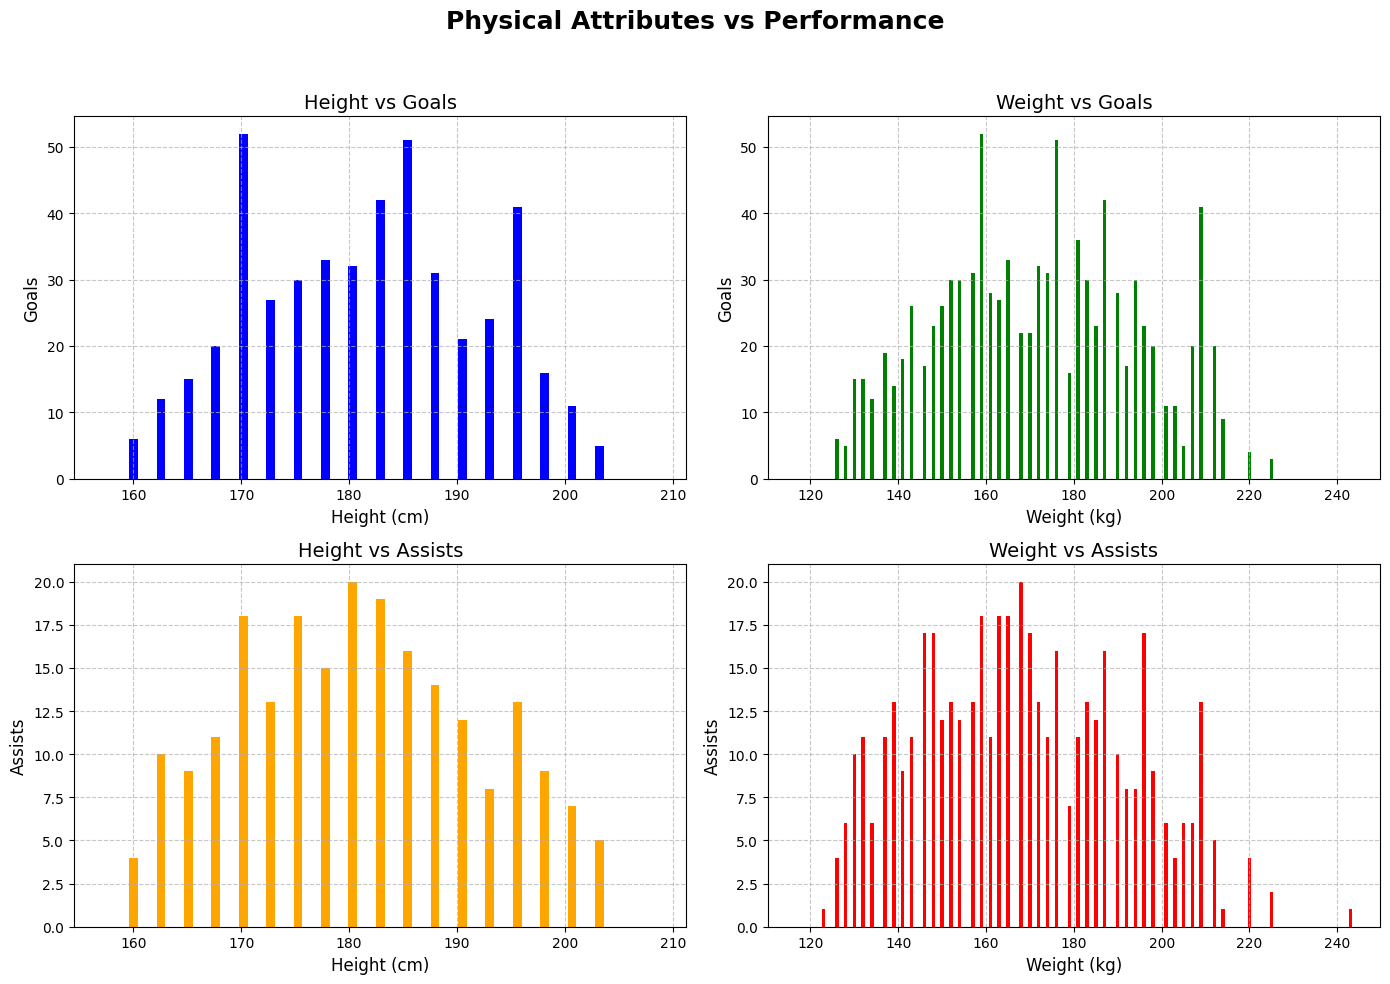

In [158]:
# Plot Height vs Goals
plot_physical_vs_performance(players_from_csv)


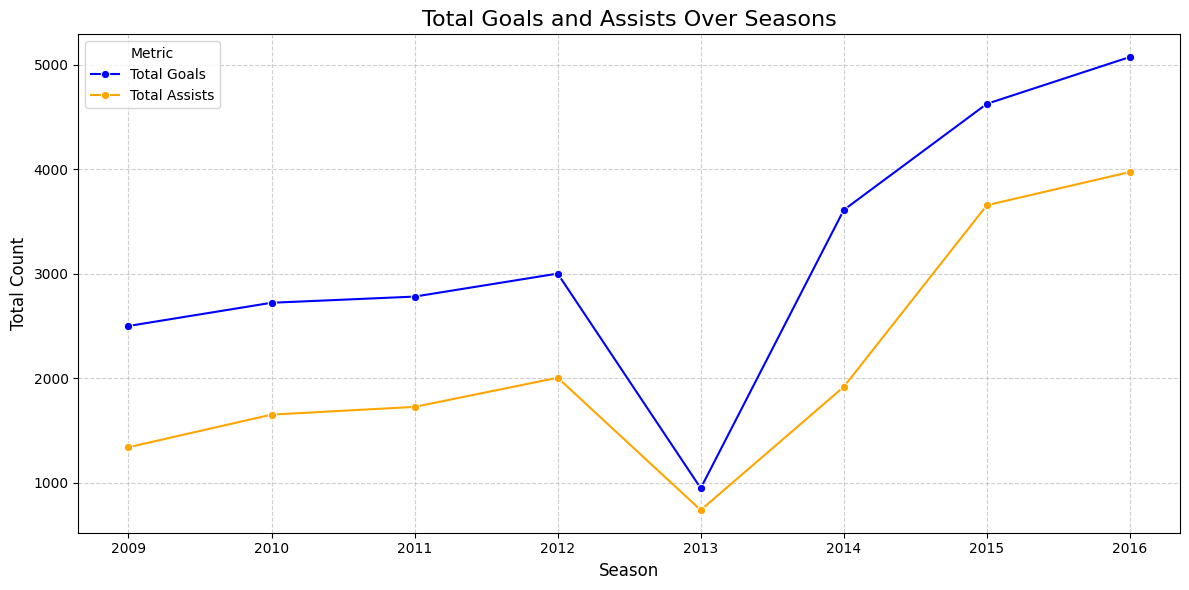

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_goals_and_assists_over_seasons(data_file):
    """
    Creates a line plot of assists and goals over seasons.

    Parameters:
    - data_file (str): Path to the CSV file containing player data.

    Returns:
    - None (displays the plot).
    """
    # Load the dataset
    data = pd.read_csv(data_file)
    
    # Ensure the season column is correctly formatted (e.g., extract the year if necessary)
    if 'season' not in data.columns:
        data['season'] = pd.to_datetime(data['date']).dt.year
    
    # Group data by season and calculate total goals and assists
    season_data = data.groupby('season')[['goals', 'assist']].sum().reset_index()
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='season', y='goals', data=season_data, marker='o', label='Total Goals', color='blue')
    sns.lineplot(x='season', y='assist', data=season_data, marker='o', label='Total Assists', color='orange')
    
    # Add titles and labels
    plt.title('Total Goals and Assists Over Seasons', fontsize=16)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Total Count', fontsize=12)
    plt.legend(title='Metric', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Example usage
data_file = './ML/player.csv'
plot_goals_and_assists_over_seasons(data_file)


In [160]:
def plot_avg_performance_by_season(data, performance_column='goals'):
    """
    Plots the average performance (goals or assists) by season.
    
    Parameters:
    - data (DataFrame): The dataset containing 'season' and performance columns.
    - performance_column (str): Column name for the performance metric ('goals' or 'assist').
    
    Returns:
    - None: Displays the plot.
    """
    # Ensure the performance column and season column exist
    if 'season' not in data.columns or performance_column not in data.columns:
        raise ValueError(f"Columns 'season' and/or '{performance_column}' not found in the dataset.")
    
    # Drop rows with missing values in 'season' or performance column
    valid_data = data.dropna(subset=['season', performance_column])
    
    # Group by season and calculate the average performance
    avg_performance = valid_data.groupby('season')[performance_column].mean().reset_index()
    
    # Plot the average performance by season
    plt.figure(figsize=(10, 6))
    plt.plot(avg_performance['season'], avg_performance[performance_column], marker='o', color='blue')
    plt.title(f"Average {performance_column.capitalize()} per Season", fontsize=16)
    plt.xlabel('Season', fontsize=14)
    plt.ylabel(f"Average {performance_column.capitalize()}", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


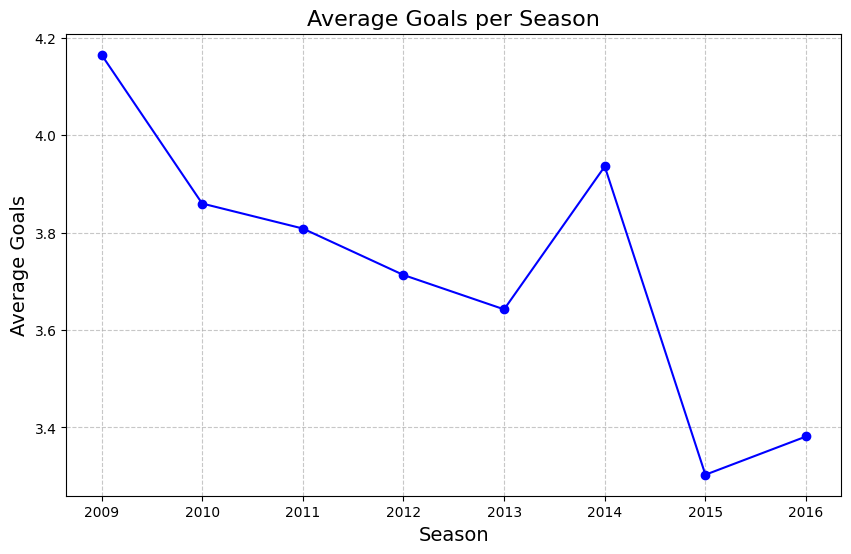

In [161]:
plot_avg_performance_by_season(players_from_csv, performance_column='goals')

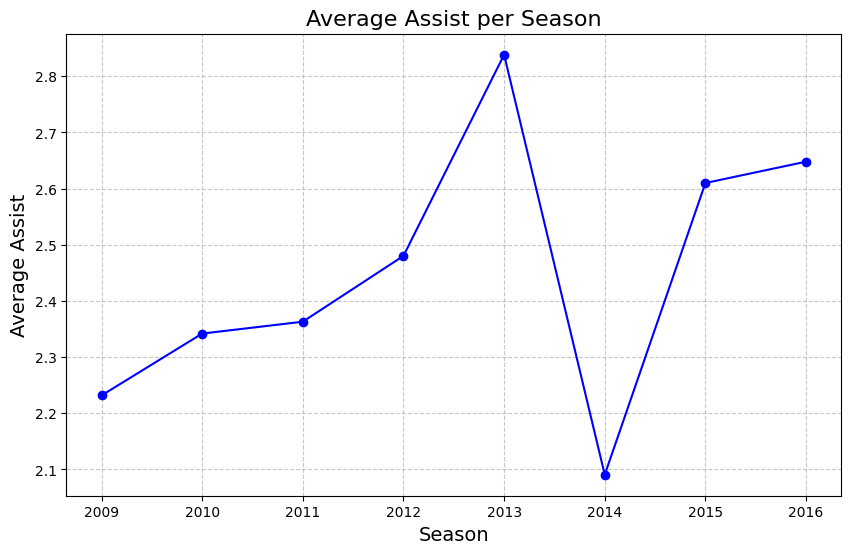

In [162]:
plot_avg_performance_by_season(players_from_csv, performance_column='assist')

# Analyse des Equipes


In [200]:
 
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt


database = './database.sqlite' 

#sqlite3.connect() Creates a connection object
conn = sqlite3.connect(database)
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [237]:
match_tm= pd.read_sql("""SELECT match_api_id,
                   Country.name as country_name,
                   League.name as league_name,
                   HomeTeam.team_long_name as HomeTeam_long_name,
                   HomeTeam.team_short_name as HomeTeam_short_name ,
                   AwayTeam.team_long_name as AwayTeam_long_name ,
                   AwayTeam.team_short_name as AwayTeam_short_name,
                   season, stage, date, home_team_api_id
                   , away_team_api_id, 
                   home_team_goal,
                   away_team_goal
                   FROM Match
                   JOIN Country ON Match.country_id= Country.id
                   JOIN League ON Match.league_id= League.id
                   JOIN Team HomeTeam on Match.home_team_api_id=HomeTeam.team_api_id 
                   JOIN Team AwayTeam on Match.away_team_api_id=AwayTeam.team_api_id;""", conn)
match_tm.head(30)

,match_api_id,country_name,league_name,HomeTeam_long_name,HomeTeam_short_name,AwayTeam_long_name,AwayTeam_short_name,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,492473,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,2008/2009,1,2008-08-17 00:00:00,9987,9993,1,1
1,492474,Belgium,Belgium Jupiler League,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0
2,492475,Belgium,Belgium Jupiler League,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,2008/2009,1,2008-08-16 00:00:00,9984,8635,0,3
3,492476,Belgium,Belgium Jupiler League,KAA Gent,GEN,RAEC Mons,MON,2008/2009,1,2008-08-17 00:00:00,9991,9998,5,0
4,492477,Belgium,Belgium Jupiler League,FCV Dender EH,DEN,Standard de Liège,STL,2008/2009,1,2008-08-16 00:00:00,7947,9985,1,3
5,492478,Belgium,Belgium Jupiler League,KV Mechelen,MEC,Club Brugge KV,CLB,2008/2009,1,2008-09-24 00:00:00,8203,8342,1,1
6,492479,Belgium,Belgium Jupiler League,KSV Roeselare,ROS,KV Kortrijk,KOR,2008/2009,1,2008-08-16 00:00:00,9999,8571,2,2
7,492480,Belgium,Belgium Jupiler League,Tubize,TUB,Royal Excel Mouscron,MOU,2008/2009,1,2008-08-16 00:00:00,4049,9996,1,2
8,492481,Belgium,Belgium Jupiler League,KVC Westerlo,WES,Sporting Charleroi,CHA,2008/2009,1,2008-08-16 00:00:00,10001,9986,1,0
9,492564,Belgium,Belgium Jupiler League,Club Brugge KV,CLB,KV Kortrijk,KOR,2008/2009,10,2008-11-01 00:00:00,8342,8571,4,1


In [236]:
#match.to_csv('./match.csv')

In [238]:
match_tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_api_id         25979 non-null  int64 
 1   country_name         25979 non-null  object
 2   league_name          25979 non-null  object
 3   HomeTeam_long_name   25979 non-null  object
 4   HomeTeam_short_name  25979 non-null  object
 5   AwayTeam_long_name   25979 non-null  object
 6   AwayTeam_short_name  25979 non-null  object
 7   season               25979 non-null  object
 8   stage                25979 non-null  int64 
 9   date                 25979 non-null  object
 10  home_team_api_id     25979 non-null  int64 
 11  away_team_api_id     25979 non-null  int64 
 12  home_team_goal       25979 non-null  int64 
 13  away_team_goal       25979 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 2.8+ MB


In [239]:
team_statos = pd.read_csv('./teams_stats.csv')

In [240]:
team_statos


,HomeTeam_long_name,home_team_goal,away_team_goal
0,1. FC Kaiserslautern,37,47
1,1. FC Köln,116,139
2,1. FC Nürnberg,108,118
3,1. FSV Mainz 05,171,129
4,AC Ajaccio,64,77
...,...,...,...
291,Xerez Club Deportivo,20,29
292,Zagłębie Lubin,116,108
293,Zawisza Bydgoszcz,43,38
294,Évian Thonon Gaillard FC,105,103


In [205]:
team_statos['total_goals'] = team_statos['away_team_goal']+ team_statos['home_team_goal']

In [206]:
team_statos[team_statos['HomeTeam_long_name'] == 'FC Barcelona']

,HomeTeam_long_name,home_team_goal,away_team_goal,total_goals
75,FC Barcelona,495,101,596


In [251]:
top_home_scorers = team_statos.sort_values(by='home_team_goal',ascending=False)
top_home_scorers = top_home_scorers[['HomeTeam_long_name','home_team_goal']]
top_home_scorers

,HomeTeam_long_name,home_team_goal
211,Real Madrid CF,505
75,FC Barcelona,495
49,Celtic,389
77,FC Bayern Munich,382
184,PSV,370
...,...,...
5,AC Arles-Avignon,14
264,Trofense,14
103,Feirense,13
56,Córdoba CF,12


In [ ]:
top_away_scorers = team_statos.sort_values(by='home_team_goal',ascending=False)
top_away_scorers = top_home_scorers[['HomeHome_long_name','home_team_goal']]
top_away_scorers

In [222]:
def plot():
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    fig.suptitle("Physical Attributes vs Performance", fontsize=18, weight='bold')
    
    # Scatter Plot: Height vs Goals
    axes[0].bar(top_home_scorers['HomeTeam_long_name'], top_home_scorers['home_team_goal'], alpha=0.6, color='blue')
    axes[0].set_title("", fontsize=14)
    axes[0].set_xlabel("Height (cm)", fontsize=12)
    axes[0].set_ylabel("Goals", fontsize=12)
    axes[0].grid(True, linestyle='--', alpha=0.7)
    
    # Scatter Plot: Weight vs Goals
    axes[1].bar(top_away_scorers['AwayTeam_long_name'], top_away_scorers['away_team_goal'], alpha=0.6, color='green')
    axes[1].set_title("Weight vs Goals", fontsize=14)
    axes[1].set_xlabel("Weight (kg)", fontsize=12)
    axes[1].set_ylabel("Goals", fontsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

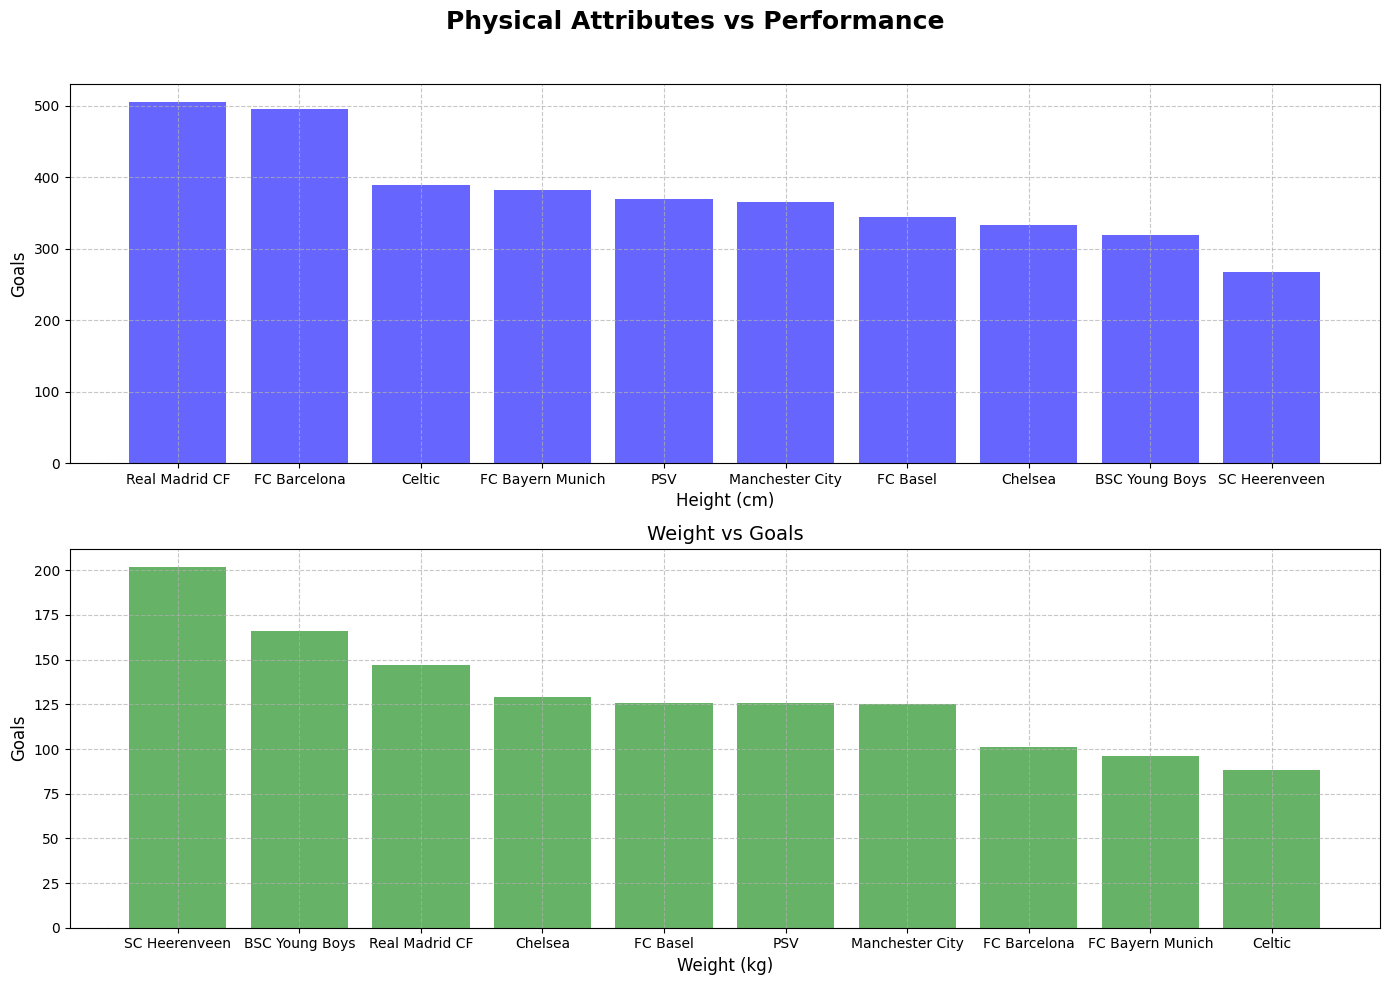

In [223]:
plot()

In [234]:
import datetime as dt
match_teams = match_teams.copy()
match_teams['date'] = pd.to_datetime(match_teams['date'])
match_teams['date'] = match_teams['date'].dt.year
match_teams_grouped = match_teams.groupby(['date','HomeTeam_long_name'])['home_team_goal'].sum()
match_teams_grouped = pd.DataFrame(match_teams_grouped)
match_teams_grouped.to_csv('./mathes_groupped_by_season.csv')
mathes_groupped_by_season = pd.read_csv('./mathes_groupped_by_season.csv')
match_teams_grouped = match_teams.groupby(['date','HomeTeam_long_name'])['home_team_goal'].sum()
match_teams_grouped = pd.DataFrame(match_teams_grouped)
match_teams_grouped
#match_teams_grouped.to_csv('./mathes_groupped_by_season.csv')
#mathes_groupped_by_season = pd.read_csv('./mathes_groupped_by_season.csv')

home_team_goal
date HomeTeam_long_name                      
1970 1. FC Kaiserslautern                  37
     1. FC Köln                           116
     1. FC Nürnberg                       108
     1. FSV Mainz 05                      171
     AC Ajaccio                            64
...                                       ...
     Xerez Club Deportivo                  20
     Zagłębie Lubin                       116
     Zawisza Bydgoszcz                     43
     Évian Thonon Gaillard FC             105
     Śląsk Wrocław                        176

[296 rows x 1 columns]

In [228]:
mathes_groupped_by_season

,date,HomeTeam_long_name,home_team_goal
0,1970,1. FC Kaiserslautern,37
1,1970,1. FC Köln,116
2,1970,1. FC Nürnberg,108
3,1970,1. FSV Mainz 05,171
4,1970,AC Ajaccio,64
...,...,...,...
291,1970,Xerez Club Deportivo,20
292,1970,Zagłębie Lubin,116
293,1970,Zawisza Bydgoszcz,43
294,1970,Évian Thonon Gaillard FC,105


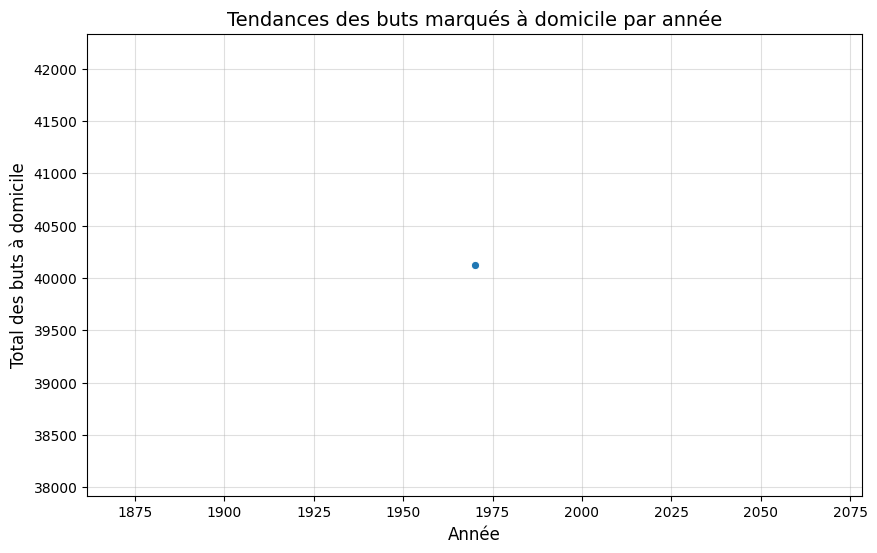

   date  home_team_goal
0  1970           40127


In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_home_goals_trends(data_file):
    """
    Analyse les tendances des buts marqués à domicile au fil des années.

    Paramètres :
        data_file (str) : Chemin vers le fichier CSV contenant les données des matchs.
    """
    # Charger les données
    try:
        data = pd.read_csv(data_file)
    except Exception as e:
        print(f"Erreur lors du chargement du fichier : {e}")
        return

    # Vérifier les colonnes nécessaires
    required_columns = ['date', 'HomeTeam_long_name', 'home_team_goal']
    if not all(col in data.columns for col in required_columns):
        print(f"Le fichier doit contenir les colonnes suivantes : {required_columns}")
        return

    # Agrégation des buts par année
    yearly_goals = data.groupby('date')['home_team_goal'].sum().reset_index()

    # Visualisation des tendances
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=yearly_goals, x='date', y='home_team_goal', marker='o', linewidth=2)
    plt.title('Tendances des buts marqués à domicile par année', fontsize=14)
    plt.xlabel('Année', fontsize=12)
    plt.ylabel('Total des buts à domicile', fontsize=12)
    plt.grid(alpha=0.4)
    plt.show()

    print(yearly_goals)

# Exemple d'utilisation
data_file = './mathes_groupped_by_season.csv'
analyze_home_goals_trends(data_file)

In [230]:
import datetime as dt
match['date'] = pd.to_datetime(match['date'])
match['date'] = match['date'].dt.year
match_grouped = match.groupby(['date','HomeTeam_long_name'])['home_team_goal'].sum()
match_grouped = pd.DataFrame(match_grouped)
match_grouped.to_csv('./mathes_groupped_by_season.csv')
mathes_groupped_by_season = pd.read_csv('./mathes_groupped_by_season.csv')


In [231]:
mathes_groupped_by_season.sort_values(by=['HomeTeam_long_name'])

,date,HomeTeam_long_name,home_team_goal
0,1970,1. FC Kaiserslautern,37
1,1970,1. FC Köln,116
2,1970,1. FC Nürnberg,108
3,1970,1. FSV Mainz 05,171
4,1970,AC Ajaccio,64
...,...,...,...
291,1970,Xerez Club Deportivo,20
292,1970,Zagłębie Lubin,116
293,1970,Zawisza Bydgoszcz,43
294,1970,Évian Thonon Gaillard FC,105
